<h2 align="center">Image Compression with K-means Clustering</h2>

###  Importing Libraries
---

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

###  Data Preprocessing 
---

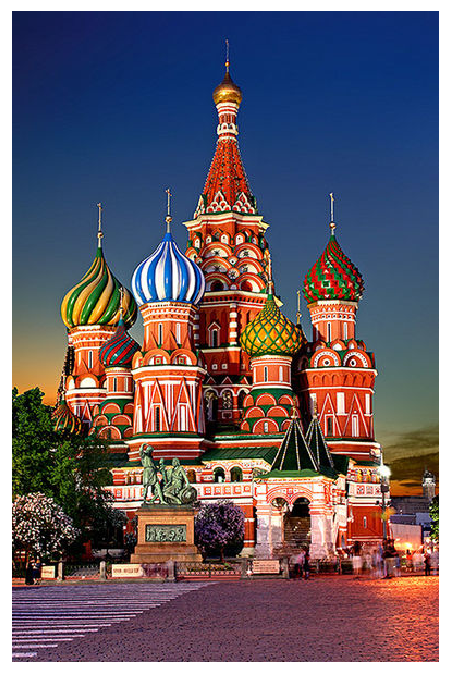

In [3]:
img =io.imread('images/1-Saint-Basils-Cathedral.jpg')
#read the image and store it as numpy array
ax = plt.axes(xticks=[], yticks=[])
#we don't want no to show on plot
ax.imshow(img);
#display on jupyter notebook fronntend
#we don't want the image's reference to be printed, we add semicolon

In [4]:
img.shape
#to see the dimensions and depth of colour of image
#we think it as stack of 3 grids each of 600x394 pixels

(600, 394, 3)

In [5]:
#unroll this array into 1 long vector for each of the 3 colour channels
#normalise pixel values rescaled btwn 0&1 instead of 0 and 255
img_data = (img/255.0).reshape(-1,3)
img_data.shape

(236400, 3)

###  Visualizing the Color Space using Point Clouds
---

In [6]:
#visualise image as cloud of points in a 3-d colour space
#height x width x no. of colour channels
from plot_utils import plot_utils

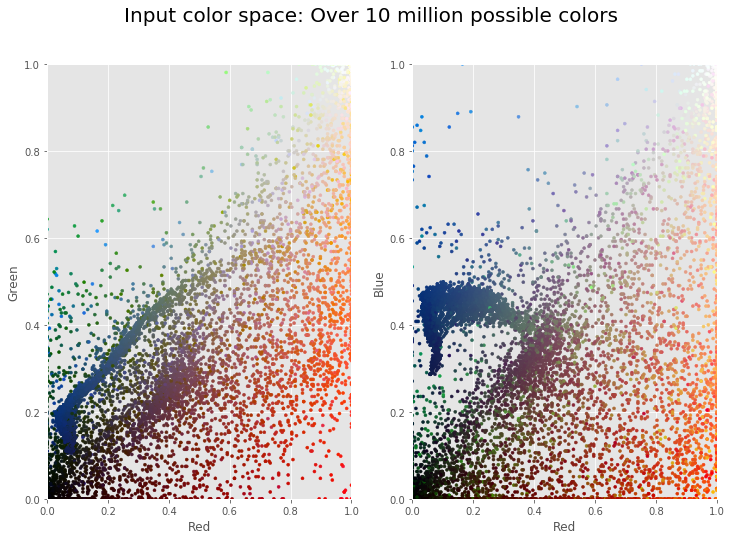

In [7]:
x = plot_utils(img_data, title='Input color space: Over 10 million possible colors')
x.colorSpace()

###  Visualizing the K-means Reduced Color Space
---An animated gif of K-means Clustering in action

<a title="Incheol [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif"><img width="300" alt="Kmeans animation" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Kmeans_animation.gif"></a>
<h5 align="center">Incheol [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif">via Wikimedia Commons</a></h5>

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each remaing pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

#### Perform K-means Clustering on original input image and reduce the number of colours from over 16 million to just k=16 therby compressing the image

In [8]:
from sklearn.cluster import MiniBatchKMeans

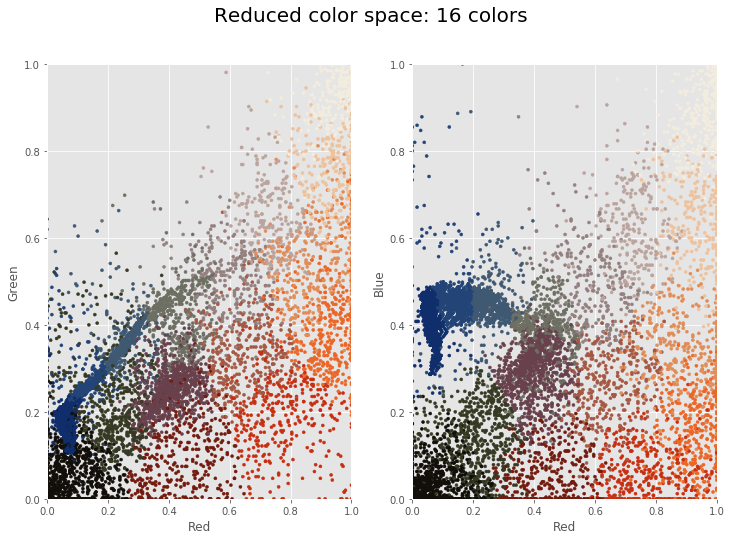

In [9]:
#recolor remaining colors with latest cluster assignments that k means converged to
kmeans = MiniBatchKMeans(16).fit(img_data)
#recolor each image with latest cluster assignments that k means converged to
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] 

y = plot_utils(img_data, colors=k_colors, title='Reduced color space: 16 colors')
y.colorSpace()

###  K-means Image Compression with Interactive Controls
---

In [10]:
#this variable is to store the drop down image option
#which we get from image directory
img_dir = 'images/' 

In [11]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,continuous_update=False,layout=dict(width='100%'))):
    input_img = io.imread(img_dir+image) #take preprocessed image,img_dir+image takes full path of image and reads it as numpy array
    #original image
    img_data = (input_img / 255.0).reshape(-1, 3) #normalise data and reshape it into 3 long vectors
    
    kmeans = MiniBatchKMeans(k).fit(img_data) #k changes with slider
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    #loading original image in programs memory & replace each pixel from original image with the nearest of the centroid color found from k means clustering
    #compressed image
    k_img = np.reshape(k_colors, (input_img.shape)) #recolor and reshape image to view original and compressed image side by side
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-Means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    #add offset to both plots so they don't overlap
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…